In [ ]:
#classifying multilabel components

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import pickle


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# In the training data, the comments are labelled as one or more of the 
# six categories; toxic, severe toxic, obscene, threat, insult and identity hate. 
# This is essentially a multi-label classification problem.
cols_target = ['insult','toxic','severe_toxic','identity_hate','threat','obscene']


In [4]:
# check for null comments in test_df
print(test_df.isnull().any())

id              False
comment_text    False
dtype: bool


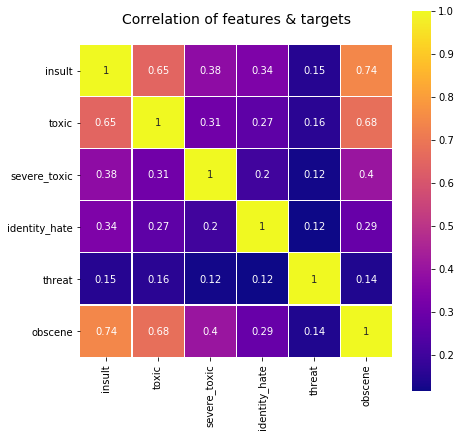

In [5]:
#no null values in test_df
# All rows in the training and test data contain comments, so there's no need to clean 
# up null fields.
# Next, let's examine the correlations among the target variables.
data = train_df[cols_target]
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)


In [6]:

# Define a function to clean up the comment text, basic NLP
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [7]:
# clean the comment_text in both the datasets.
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))
test_df['comment_text'] = test_df['comment_text'].map(lambda com : clean_text(com))

In [8]:

# Define all_text from entire train & test data for use in tokenization by Vectorizer
train_text = train_df['comment_text']
test_text = test_df['comment_text']
all_text = pd.concat([train_text, test_text])

In [9]:
# Vectorize the data
# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
word_vect = CountVectorizer(strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',stop_words='english',ngram_range=(1, 1))
    


In [10]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
word_vect.fit(all_text)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}',
                tokenizer=None, vocabulary=None)

In [11]:
# transform the data using the earlier fitted vocabulary, into a document-term matrix
train_features = word_vect.transform(train_text)
test_features = word_vect.transform(test_text)

In [12]:
#saving word vectorizer vocab as pkl file to be loaded afterwards
pickle.dump(word_vect.vocabulary_,open('word_feats.pkl','wb'))

In [13]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)


In [14]:
submission_binary = pd.read_csv('sample_submission.csv')

In [15]:
mapper = {}
for label in cols_target:
    mapper[label] = logreg
    filename = str(label+'_model.sav')
    print(filename)
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using train_features & y
    mapper[label].fit(train_features, y)

    #saving the fitted model for class "label"
    pickle.dump(mapper[label], open(filename, 'wb'))

    # compute the training accuracy
    y_pred_X = mapper[label].predict(train_features)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = mapper[label].predict_proba(test_features)[:,1]
    submission_binary[label] = test_y_prob


insult_model.sav
... Processing insult


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9751333262309567
toxic_model.sav
... Processing toxic


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9813123938560264
severe_toxic_model.sav
... Processing severe_toxic


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9921414292070614
identity_hate_model.sav
... Processing identity_hate


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.9931691848769513
threat_model.sav
... Processing threat


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy is 0.998521034523817
obscene_model.sav
... Processing obscene
Training accuracy is 0.9843329928370443


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
# generate submission file
submission_binary.to_csv('submission_binary.csv',index=False)